In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 13, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]

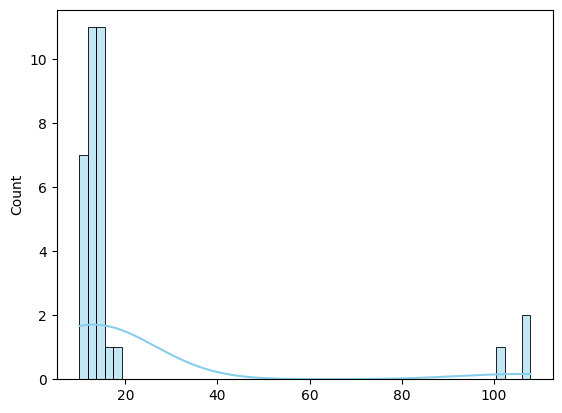

In [3]:
sns.histplot(dataset, kde=True, color="skyblue") #kernel density estimation
plt.show()

In [4]:
mean = np.mean(dataset)
std = np.std(dataset)
print(mean, std)

21.205882352941178 26.362606552111902


In [5]:
outliers = []


for i in dataset:
    z = (i - mean) / std
    if z > (mean + 3 * std) / 100 or z < (mean - 3 * std) / 100:
        outliers.append(i)

outliers

[102, 107, 108]

In [6]:
clean_data = [item for item in dataset if item not in outliers]
clean_data
# dataset

[11,
 10,
 12,
 14,
 12,
 15,
 14,
 13,
 15,
 12,
 14,
 17,
 19,
 10,
 13,
 13,
 14,
 12,
 12,
 11,
 14,
 13,
 15,
 10,
 15,
 12,
 10,
 14,
 13,
 15,
 10]

<Axes: >

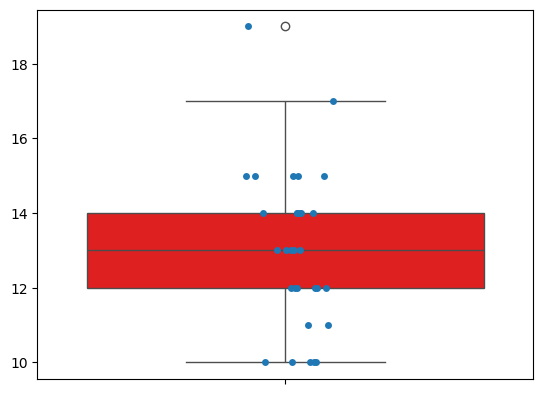

In [7]:
sns.boxplot(data=clean_data, color="red")
sns.stripplot(clean_data)

In [8]:
THRESHOLD = 3
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 13, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]
def detect_outliers(data):
    outliers = []
    mean = np.mean(data)
    std = np.median(data)

    for i in dataset:
        z_score = (i - mean) / std

        if np.abs(z_score) > THRESHOLD:
            outliers.append(i)

    return outliers

outliers = detect_outliers(data=dataset)
print(outliers)

[102, 107, 108]


In [27]:
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 13, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]

def quartiles(datas, quartile):
    data = sorted(datas)
    length = len(data)
    
    if length % 2 != 0:
        q = data[(quartile * (length + 1) // 4) - 1]
    else:
        th_item = quartile * (length + 1) // 4
        q = (data[th_item - 1] + data[th_item]) / 2
    return q

q1 = quartiles(dataset, 1)
q3 = quartiles(dataset, 3)

IQR = q3 - q1

upper_fench = q3 + 1.5 * IQR
lower_fench = q1 - 1.5 * IQR

def outliers(data, upperfench, lowerfench):
    outlier = []
    for i in data:
        if i > upperfench or i < lowerfench:
            outlier.append(i)
    return outlier


outlier = outliers(dataset, upperfench=upper_fench, lowerfench=lower_fench)

In [28]:
clean_data = [item for item in dataset if item not in outlier]
clean_data

[11,
 10,
 12,
 14,
 12,
 15,
 14,
 13,
 15,
 12,
 14,
 17,
 19,
 10,
 13,
 13,
 14,
 12,
 12,
 11,
 14,
 13,
 15,
 10,
 15,
 12,
 10,
 14,
 13,
 15,
 10]

<Axes: ylabel='Count'>

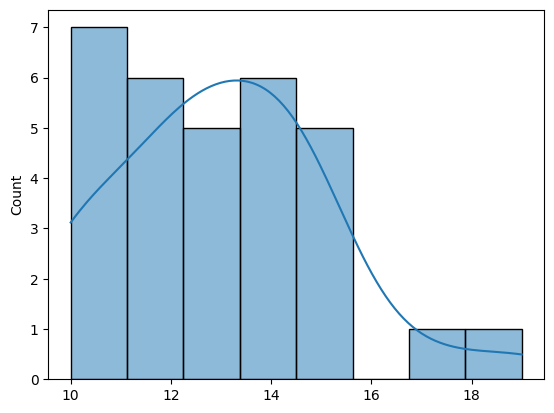

In [30]:
sns.histplot(clean_data, kde=True)

<Axes: >

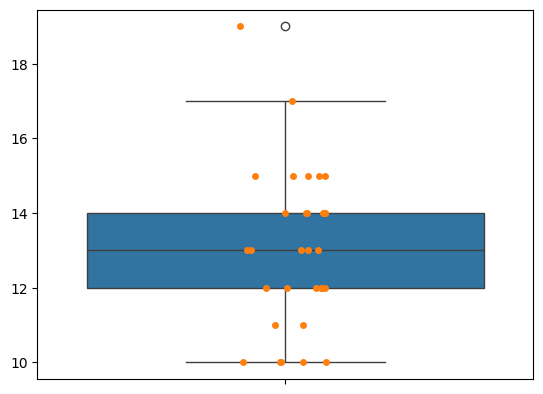

In [32]:
sns.boxplot(clean_data)
sns.stripplot(clean_data)